# Topic Modeling

## Using Gensim

Courtesy to [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/).

In [1]:
import sys

In [2]:
sys.version

'3.6.3 (default, Oct  3 2017, 21:45:48) \n[GCC 7.2.0]'

### 1. Prepare Document

Since our file from the *scrape.py* process has been saved as a .json object, import it using `json` package

In [3]:
import json

Open the file

In [4]:
with open("../data/downloaded_abs.json") as json_data:
    d = json.load(json_data)

Now append each of the abstracts into one list

In [5]:
doc_complete = []
for docs in d['Abstract']:
    doc_complete.append(''.join(docs))

### 2. Clean and Preprocessing

Now remove puncations, stopwords, and normalize the corpus (i.e. the document with potential topics and words)

In [6]:
from nltk.corpus import stopwords

In [7]:
from nltk.stem.wordnet import WordNetLemmatizer
import string

Set up the stop word, punctuations, and lemmas. Since we know that the topic is already asthma, we want to append words like 'asthma','inflammation','allergic','airway' into the set.

In [8]:
stop = set(stopwords.words('english'))
stop.update(['asthma','inflammation','allergic','airway','child','study','effect',
             'lung','risk'])
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = ' '.join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

Run the document through the cleaning function

In [9]:
doc_clean = [clean(doc).split() for doc in doc_complete]

Let's look at a the first 10 words in the 1st document.

In [10]:
doc_clean[0][:10]

['interleukin13',
 'il13',
 'associated',
 'remodeling',
 'group',
 'found',
 'variant',
 'single',
 'nucleotide',
 'polymorphism']

### 3. Prepare Document-Term Matrix

Since the Latent-Dirichlet Allocation model will go throug the DT matrix then calculate the probabilities of the topic | doc and word | topic to get at the document topic distribution and topic-word distribution.

In [11]:
import gensim

In [12]:
from gensim import corpora

In [58]:
pyLDAvis.enable_notebook()
%matplotlib inline

Create term dictionary where every unique term is assigned an index (this will be assigned into the lower order matrices that are essentially the document-term matrix and term-word matrix)

In [13]:
dictionary = corpora.Dictionary(doc_clean)

In [54]:
dictionary.save('../data/asthma_lit_abs.dict')  # store the dictionary, for future reference

Now convert the corpora into Ducment Term matrix using the dictionary and the corpus

In [14]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

### 4. Run LDA Model

Now create an object of LDA model and train it on the DT matrix.

In [15]:
lda = gensim.models.ldamodel.LdaModel

In [16]:
ldamodel = lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)

In [56]:
ldamodel.save('../data/asthma_lit_abs.mod')

### 5. Results

In [17]:
print(ldamodel.print_topics(num_topics=10, num_words = 5))

[(0, '0.009*"disease" + 0.008*"drug" + 0.007*"biomarkers" + 0.007*"deposition" + 0.006*"data"'), (1, '0.016*"child" + 0.010*"p" + 0.010*"feno" + 0.010*"atopic" + 0.009*"group"'), (2, '0.022*"plasma" + 0.018*"aerd" + 0.016*"concentration" + 0.014*"h" + 0.014*"terbutaline"'), (3, '0.011*"response" + 0.011*"disease" + 0.010*"fev1" + 0.009*"asthma" + 0.009*"bronchodilator"'), (4, '0.012*"disease" + 0.010*"acid" + 0.009*"level" + 0.009*"intake" + 0.009*"ngal"'), (5, '0.015*"patient" + 0.014*"utilization" + 0.010*"reaction" + 0.010*"prediction" + 0.010*"change"'), (6, '0.012*"patient" + 0.011*"hospital" + 0.009*"response" + 0.008*"model" + 0.008*"data"'), (7, '0.011*"response" + 0.008*"age" + 0.008*"child" + 0.008*"hospitalization" + 0.008*"1998"'), (8, '0.023*"child" + 0.019*"r2" + 0.019*"epsilon" + 0.019*"sfc" + 0.014*"severe"'), (9, '0.020*"salmeterol" + 0.017*"salbutamol" + 0.015*"dose" + 0.012*"treatment" + 0.012*"response"')]


We can see that the first topic would be related to 'plasma', 'allergen', and 'epitope'

### 6. Visualize Using pyLDAvis

Originally I wanted to use the pyLDAvis bridged with graphlab but the process is a bit messy. So I'm just gonna use the gensim package and see where we go from there.

Since the visualization will require a corpus of dictionary words, let's save our dictionary which is an array of tokenized words.

In [42]:
print(dictionary)

Dictionary(2193 unique tokens: ['interleukin13', 'il13', 'associated', 'remodeling', 'group']...)


Test this dictionary on a new doc

In [43]:
new_doc = "asthma is a interesting disease area. Short acting beta agonists are important!"
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec)

[(84, 1), (191, 1), (253, 1), (648, 1), (913, 1), (914, 1)]


Below is the occurence of the token id and the number of occurences of the tokens (id, # of ocurrence). Let's create a corpus that captures all of the tokens in our original list of abstracts.

In [49]:
corpus = [dictionary.doc2bow(doc) for doc in doc_clean]
corpora.MmCorpus.serialize('../data/asthma_lit_abs.mm', corpus) # store to disk for later use
print(corpus[1:2])

[[(2, 1), (4, 2), (10, 1), (35, 3), (47, 1), (81, 2), (82, 2), (83, 2), (84, 1), (85, 7), (86, 11), (87, 2), (88, 1), (89, 1), (90, 4), (91, 6), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 3), (99, 3), (100, 7), (101, 2), (102, 3), (103, 2), (104, 1), (105, 1), (106, 1), (107, 2), (108, 2), (109, 2), (110, 3), (111, 2), (112, 2), (113, 2), (114, 2), (115, 1), (116, 2), (117, 2), (118, 1), (119, 1), (120, 1), (121, 1), (122, 1), (123, 2), (124, 1), (125, 1), (126, 1), (127, 4), (128, 1), (129, 1), (130, 1), (131, 1), (132, 1), (133, 1), (134, 1), (135, 2), (136, 1), (137, 1), (138, 1), (139, 1), (140, 1), (141, 1), (142, 1), (143, 1), (144, 1), (145, 1), (146, 1), (147, 1), (148, 1), (149, 1), (150, 1), (151, 1), (152, 1), (153, 1), (154, 1), (155, 1), (156, 1), (157, 1), (158, 1), (159, 1), (160, 1), (161, 1), (162, 1), (163, 1), (164, 1), (165, 1), (166, 1), (167, 1), (168, 1), (169, 1), (170, 1), (171, 1), (172, 1), (173, 1), (174, 1), (175, 1)]]


Below we define the necessary inputs for the pyLDAvis package to creat a visual for us. Using it within the jupyter environment seems not to render anything. Let's try it in the shell environment.

In [90]:
def gensim_output(modelfile, corpusfile, dictionaryfile):
    """Displaying gensim topic models"""
    ## load files from "gensim_modeling"
    corpus = corpora.MmCorpus(corpusfile)
    dictionary = corpora.Dictionary.load(dictionaryfile) # for pyLDAvis
    myldamodel = gensim.models.ldamodel.LdaModel.load(modelfile)
    
    ## interactive visualization
    import pyLDAvis.gensim
    vis = pyLDAvis.gensim.prepare(myldamodel, corpus, dictionary)
    pyLDAvis.enable_notebook()
    pyLDAvis.save_html(vis, "../figure/vis.html")

You can see that in the last line we just ave it to an html file... rather we would like to use it as a `pyLDAvis.display(vis)` statement so that we can have it rendered onto a server. Let's see if that wil work

In [91]:
import pandas as pd
%matplotlib inline

pyLDAvis.enable_notebook()
pd.options.display.max_colwidth = 5000
pd.options.display.show_dimensions


gensim_output('../data/asthma_lit_abs.mod', 
              '../data/asthma_lit_abs.mm', 
              '../data/asthma_lit_abs.dict')

### 7. Visualize using word cloud

In [92]:
import matplotlib.pyplot as plt

In [94]:
import wordcloud

Raw text

In [97]:
wordcloud_raw = wordcloud.WordCloud().generate(''.join(doc_complete))

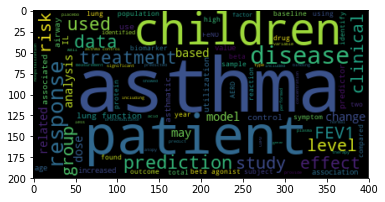

In [98]:
plt.imshow(wordcloud_raw, interpolation='bilinear')